In [1]:
# importing required libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# Load dataset
filename = 'indian_liver_dataset.csv'
df1 = read_csv(filename)

In [4]:
dataset = df1
for i in range(50):
    samp = df1.sample(n = 30)
    dataset = dataset.append(samp)

In [5]:
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# head
print(dataset.head(20))

(2083, 11)
    Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    65  Female              0.7               0.1                   187   
1    62    Male             10.9               5.5                   699   
2    62    Male              7.3               4.1                   490   
3    58    Male              1.0               0.4                   182   
4    72    Male              3.9               2.0                   195   
5    46    Male              1.8               0.7                   208   
6    26  Female              0.9               0.2                   154   
7    29  Female              0.9               0.3                   202   
8    17    Male              0.9               0.3                   202   
9    55    Male              0.7               0.2                   290   
10   57    Male              0.6               0.1                   210   
11   72    Male              2.7               1.3                   260   
1

In [6]:
dataset=dataset.drop(['Gender'], axis = 1)

In [7]:
# descriptions
print(dataset.describe())

               Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  2083.000000      2083.000000       2083.000000           2083.000000   
mean     44.930389         3.256745          1.456697            293.415747   
std      16.150721         6.116577          2.745276            240.991424   
min       4.000000         0.400000          0.100000             63.000000   
25%      33.000000         0.800000          0.200000            176.000000   
50%      45.000000         1.000000          0.300000            208.000000   
75%      58.000000         2.600000          1.200000            298.000000   
max      90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count               2083.000000                 2083.000000     2083.000000   
mean                  81.003361                  104.886222        6.478253   
std                  183.600814                  24

In [8]:
dataset.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    9
Dataset                       0
dtype: int64

In [9]:
dataset=dataset.dropna()

In [10]:
dataset.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [11]:
# class distribution
print(dataset.groupby('Dataset').size())

Dataset
1    1475
2     599
dtype: int64


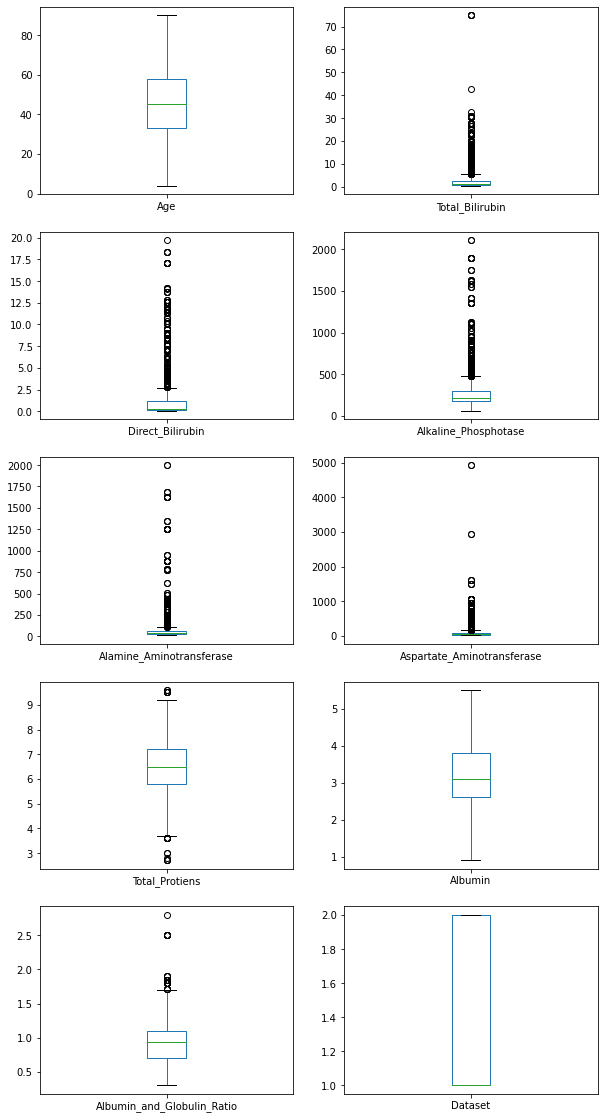

In [12]:
# Data visualizations

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(5,2),sharex=False, sharey=False, figsize=(10,20))
pyplot.show()


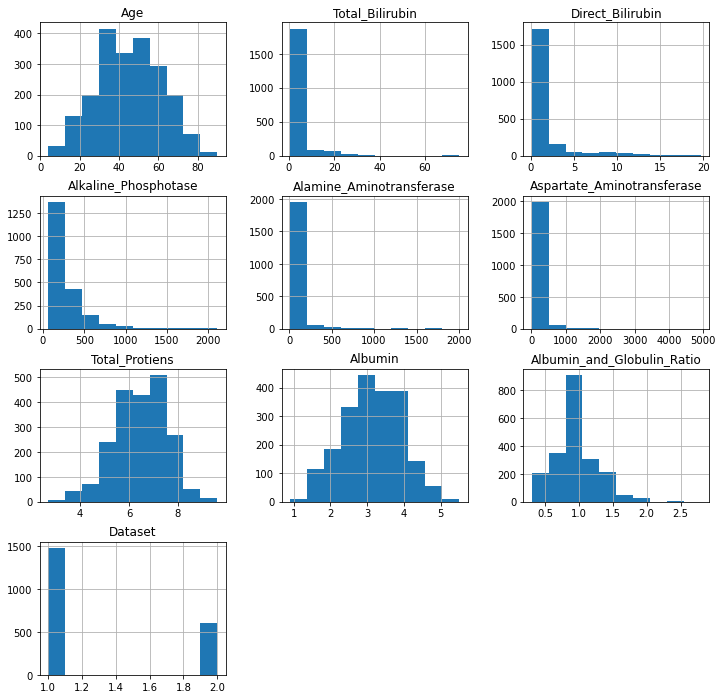

In [13]:
# histograms
dataset.hist(figsize=(12,12))
pyplot.show()

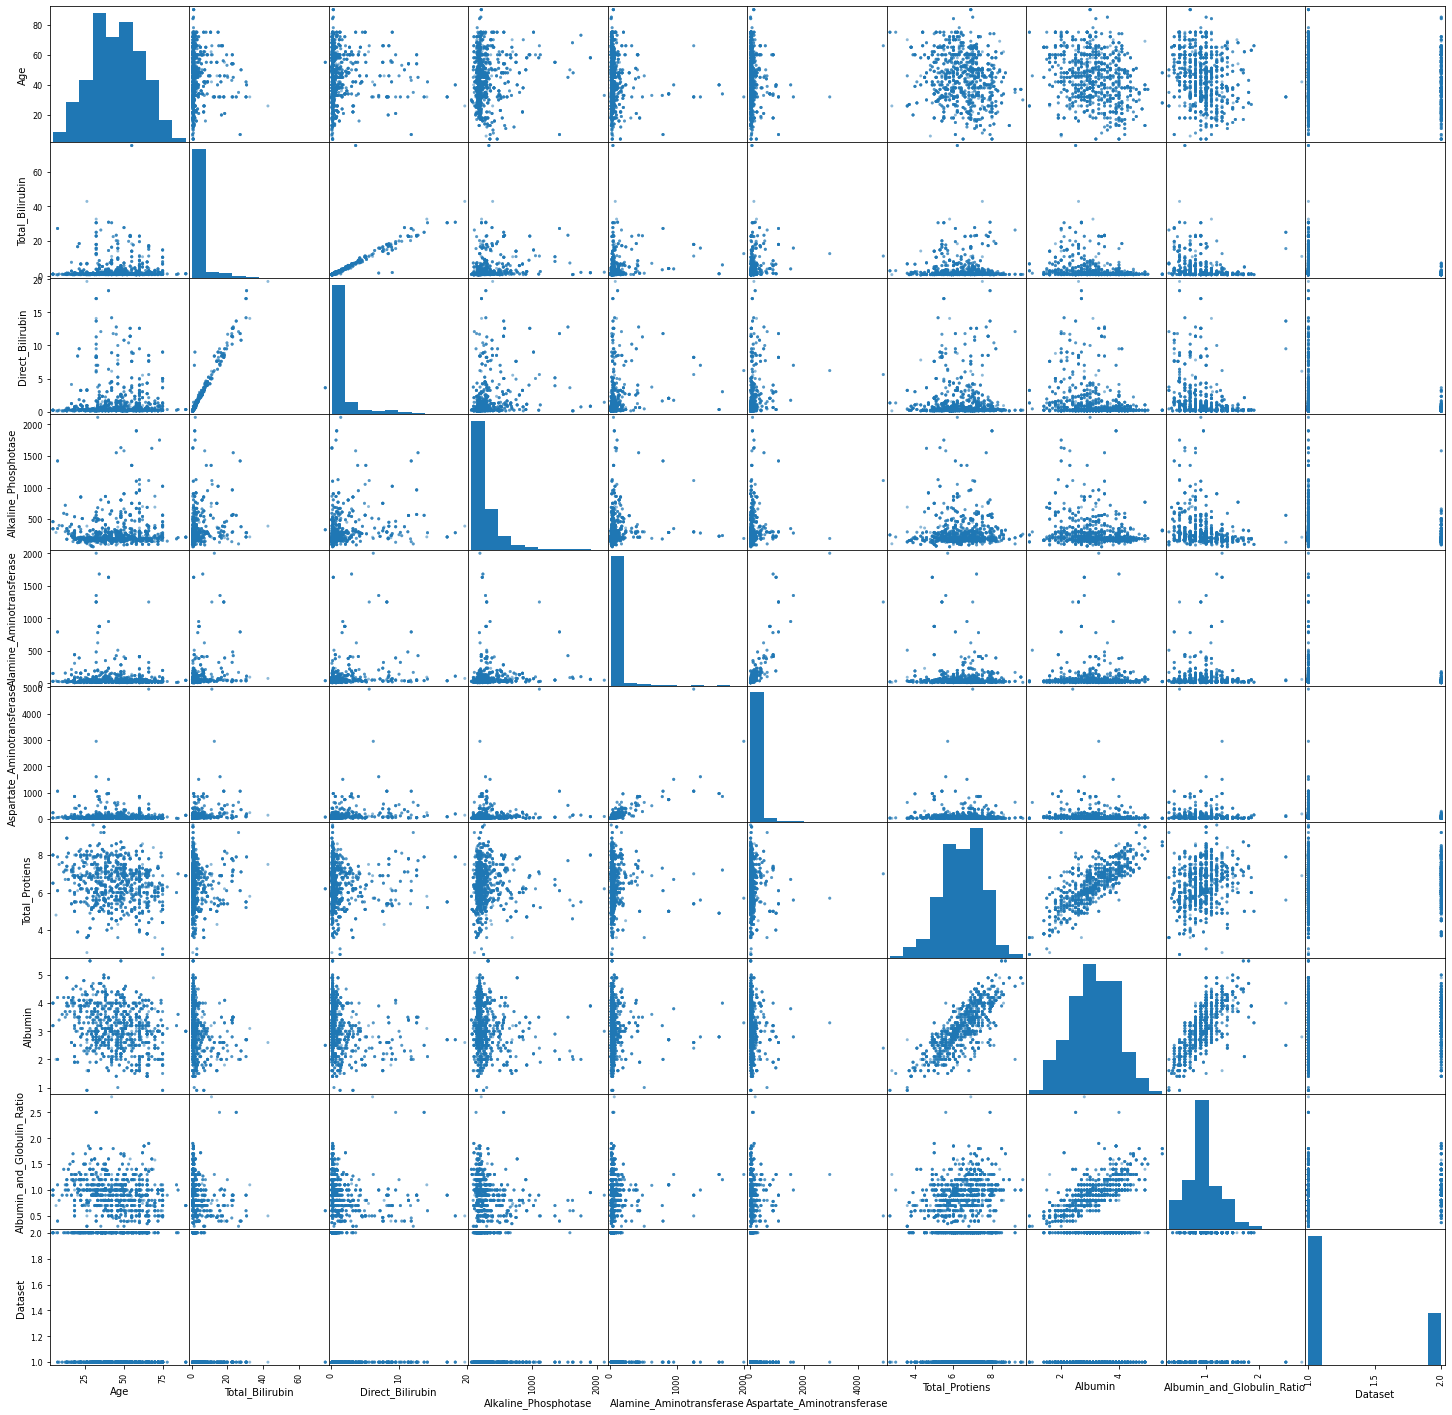

In [14]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(25,25))
pyplot.show()

In [15]:
# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.20
seed=7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



In [16]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.723322 (0.027972)
LDA: 0.709441 (0.031040)
KNN: 0.849923 (0.028250)
CART: 0.978288 (0.014343)
NB: 0.559405 (0.034500)
SVM: 0.982516 (0.009516)


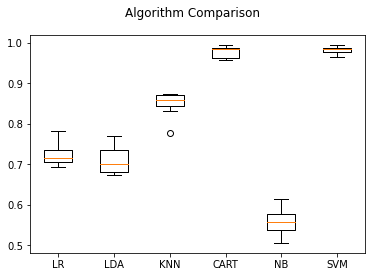

In [17]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [18]:
# Make predictions on validation dataset
Lr = LogisticRegression(solver='liblinear')
Lr.fit(X_train, Y_train)
predictions = Lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6987951807228916
[[263  23]
 [102  27]]
              precision    recall  f1-score   support

         1.0       0.72      0.92      0.81       286
         2.0       0.54      0.21      0.30       129

    accuracy                           0.70       415
   macro avg       0.63      0.56      0.55       415
weighted avg       0.66      0.70      0.65       415



In [19]:
# Make predictions on validation dataset
Svc = SVC(gamma='auto')
Svc.fit(X_train, Y_train)
predictions = Svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9710843373493976
[[286   0]
 [ 12 117]]
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       286
         2.0       1.00      0.91      0.95       129

    accuracy                           0.97       415
   macro avg       0.98      0.95      0.97       415
weighted avg       0.97      0.97      0.97       415



In [20]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.725122 (0.025451)
ScaledLDA: 0.709441 (0.031040)
ScaledKNN: 0.851110 (0.027641)
ScaledCART: 0.978288 (0.012447)
ScaledNB: 0.559405 (0.034500)
ScaledSVM: 0.733556 (0.033024)


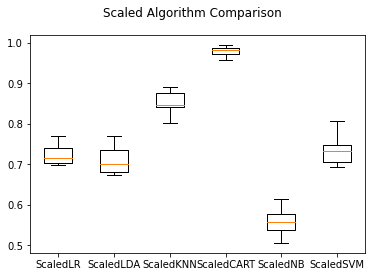

In [21]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [22]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.786028 (0.042732)
GBM: 0.878251 (0.022130)
RF: 0.978905 (0.012988)
ET: 0.983107 (0.011737)


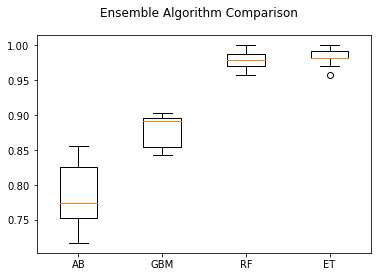

In [23]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [24]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.747419 using {'C': 2.0, 'kernel': 'rbf'}
0.716674 (0.030117) with: {'C': 0.1, 'kernel': 'linear'}
0.716674 (0.030117) with: {'C': 0.1, 'kernel': 'poly'}
0.716674 (0.030117) with: {'C': 0.1, 'kernel': 'rbf'}
0.713658 (0.031467) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.716674 (0.030117) with: {'C': 0.3, 'kernel': 'linear'}
0.722709 (0.028543) with: {'C': 0.3, 'kernel': 'poly'}
0.716674 (0.030117) with: {'C': 0.3, 'kernel': 'rbf'}
0.697379 (0.023269) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.716674 (0.030117) with: {'C': 0.5, 'kernel': 'linear'}
0.731749 (0.030791) with: {'C': 0.5, 'kernel': 'poly'}
0.717280 (0.030492) with: {'C': 0.5, 'kernel': 'rbf'}
0.673888 (0.025488) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.716674 (0.030117) with: {'C': 0.7, 'kernel': 'linear'}
0.731749 (0.029833) with: {'C': 0.7, 'kernel': 'poly'}
0.723308 (0.028647) with: {'C': 0.7, 'kernel': 'rbf'}
0.668474 (0.025707) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.716674 (0.030117) with: {'C': 0.9, 'kernel': 'linear'

In [25]:
rescaledX

array([[-1.06222981, -0.36385363, -0.41483762, ...,  0.31426658,
        -0.0506786 , -0.48458853],
       [-1.93453294, -0.38061237, -0.41483762, ...,  1.51920654,
         1.34214321,  0.16594746],
       [-0.81300034, -0.41412986, -0.45212311, ..., -0.42723494,
        -0.30391892, -0.06174014],
       ...,
       [-0.18992667, -0.39737112, -0.45212311, ...,  0.1288912 ,
        -0.17729876, -0.48458853],
       [ 0.93160593, -0.22978368, -0.34026664, ..., -2.37367641,
        -1.8233609 , -0.80985652],
       [-0.87530771, -0.39737112, -0.45212311, ...,  0.77770502,
         1.08890289,  0.81648344]])

In [26]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier(n_estimators=10)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9734939759036144
[[283   3]
 [  8 121]]
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       286
         2.0       0.98      0.94      0.96       129

    accuracy                           0.97       415
   macro avg       0.97      0.96      0.97       415
weighted avg       0.97      0.97      0.97       415

